### BMW i3
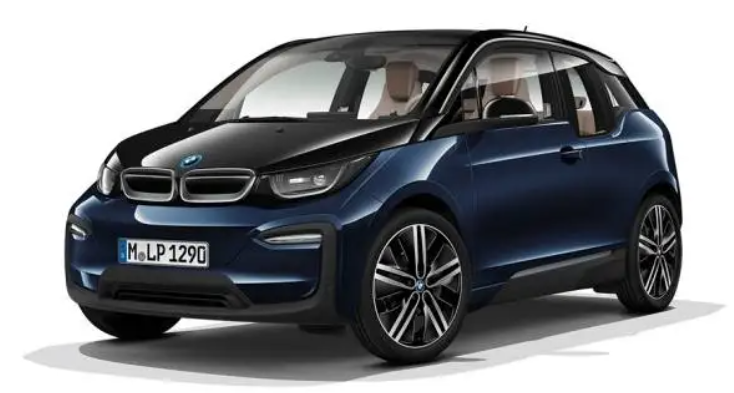
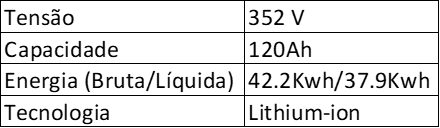

## Previsão da vida útil do ciclo da bateria a partir dos dados de operação inicial


PARTE I: Estrutura do projeto

<b>Contexto<br></b>
Atualmente, a única maneira de avaliar como a vida útil de uma bateria diminui com o passar dos anos é fazendo o ciclo completo de recarga dessa célula através de bancadas de testes, o que é muito caro, leva muito tempo e se torna economicamente inviável. Aplicando algoritmos de machine learning podemos ter, através dos dados gerados pela bateria em funcionamento, como tensão, temperatura, corrente, uma predição muito boa da vida dela através de criação de novas features engineering utilizando os conceitos de elétrica que serão abordados neste projeto.<br>
<br><b>Problema de negócio<br></b>
Sabemos que as baterias são usadas amplamente em quaisquer sistemas eletrônicos, principalmente em celulares e carros que serão os itens mais abordados no projeto. A estratégia é prever estado da carga e estado da vida da bateria que fisicamente é muito custoso e inviável do ponto de vista econômico. As indústrias automotivas e as indústrias de tecnologias buscam constantemente evoluir no quesito de melhoria destes itens e o machine learning pode fazer a diferença.<br>
<b><br>Impacto<br></b>
Uma vez a solução seja concretizada podemos ter vários benefícios dos quais citados abaixo:
- Prolongando a vida útil da bateria
- Otimização do uso da bateria até o fim da vida útil real
- Reduzindo o número de células defeituosas
- Diminuição do descarte (Importante por ser um lixo tóxico)
Com o uso do machine learning, podemos confiar no uso real da bateria e determinar se precisa reparar ou substituir peças mais cedo para evitar falhas ou mais tarde para preservar custos indesejados. Você não precisa mais adivinhar ou seguir cegamente os conselhos do fabricante sobre quando realizar a manutenção.<br>

<b>Desenho da solução<br></b>
Provavelmente iremos seguir com regressão, porém iremos fazer alguns outros testes com diferentes métodos de machine learning para avaliar qual se torna mais efetivo, robusto e com melhor performance utilizando métricas como erro médio absoluto em inglês (Mean Absolute Error - MAE), erro absoluto máximo em inglês (Maximum Absolute Error - MaxAE) e erro médio da raiz quadrada em inglês (Root Mean Square Error - RMSE).
Terei que utilizar uma parte sobre teoria de bateria para fazer o levantamento das features engineering para o cálculo do SOC (estado de carga) e do SOH (estado de vida).

<br><b>Algumas Definições Importantes</b><br>
SOC é um dos parâmetros mais importantes para baterias, mas sua definição apresenta muitos problemas diferentes. Em geral, o SOC de uma bateria é definido como a relação entre sua capacidade atual e a capacidade nominal. A capacidade nominal é fornecida pelo fabricante e representa a quantidade máxima de carga que pode ser armazenada na bateria. O SOC pode ser definido da seguinte forma:


$$SoC= \Bigg(\frac{\textrm{Capacidade Medida}}{\textrm{C-rate}}\Bigg)x100$$

Estado de carga (SOC) é o nível de carga de uma bateria elétrica em relação à sua capacidade. As unidades de SOC são pontos percentuais (0% = vazio; 100% = cheio).


### 1 - Características do Dataset<br>

<b>O dataset inclui os seguintes dados:</b><br><br>
Time - Tempo em Seg.<br>
Velocity - Velocidade em km/h<br>
Elevation - Altitude em m<br>
Throttle - posição do pedal do acelerador em %<br>
Motor Torque - Torque do Motor N.m<br>
Longitudinal Acceleration - Aceleração Longitudinal m/s²<br>
Regenerative Brake - Sinal do Freio Regenerativo<br>
BAttery Voltage - Tensão da Bateria em V<br>
Battery Current - Corrente da Bateria em A<br>
Battery Temperature - Temperatura da Bateria em °Cbr>
Max Battery Temperature - Temperatura Máxima da Bateria em °C<br>
SoC - State of Charge (Estado de Carga em % <br>
Displayed SoC - Estado de Carga Mostrado em % <br>
Min SoC - Minimo estado de Carga em %<br>
Máx SoC - Máximo estado de Carga em %<br>
Heating Power CAN - Potência do Aquecedor na rede CAN Kw<br>
Heating Power LIN - Potência do Aquecedor na rede LIN Kw<br>
Requested Heating Power - Potência Requisitada em W<br>
AirCon Power - Potência do Ar Condicionado em KW<br>
Heater Signal - Sinal do Aquecedor binário<br>
Heater Current - Corrente do Aquecedor A <br>
Ambient Temperature  - Temperatura Ambiente °C<br>
Coolant Temperature Heatercore - Temperatura do Líquido do Radiador de Cabine °C <br>
Requested Coolant Temperature - Temperatura Solicitada do Líquido de Arrefecimento °C <br>
Coolant Temperature Inlet - Temperatura do Líquido de Arrefecimento na Entrada °C <br>
Heat Exchanger Temperature - Temperatura do Trocador de Calor °C <br>
Cabin Temperature Sensor  - Temperatura do Sensor de Cabine °C

### 2 - Iniciando o processo exploratório dos dados

#### 2.1 - Importando as bibliotecas a serem utilizadas

In [1]:
import pandas as pd
import janitor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import warnings
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
import missingno

#### 2.2 - Pre-configurando algums valores para o Jupyter

In [2]:
warnings.simplefilter("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

#### 2.3 - Lendo as base de dados e armazenando nas variáveis e avaliando o dataset

In [3]:
dataset = pd.read_csv('data/TripA06.csv', sep=';', encoding='cp1252')

In [4]:
display(dataset.head(2))

,Time [s],Velocity [km/h],Elevation [m],Throttle [%],Motor Torque [Nm],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [°C],max. Battery Temperature [°C],SoC [%],displayed SoC [%],min. SoC [%],max. SoC [%),Heating Power CAN [kW],Requested Heating Power [W],AirCon Power [kW],Heater Signal,Ambient Temperature [°C],Requested Coolant Temperature [°C],Heat Exchanger Temperature [°C],Cabin Temperature Sensor [°C]
0,0.0,0.0,578.0,0.0,0.0,0.15,0.0,389.90,-16.00,25.0,26.0,85.1,100.0,8,90,5.8,4920.00,0.96,1,26.5,85,9.5,27.67
1,0.1,0.0,578.0,0.0,0.0,0.16,0.0,389.96,-16.53,25.0,26.0,85.1,100.0,8,90,5.8,4912.26,0.96,1,26.5,85,9.5,27.67


In [5]:
display(f'O Dataset de validação contém {dataset.shape[0]} observações e {dataset.shape[1]} variáveis.')

'O Dataset de validação contém 31645 observações e 23 variáveis.'

#### 2.4 -Verificando Nulos e fazendo algum tratamento caso necessário

<AxesSubplot:>

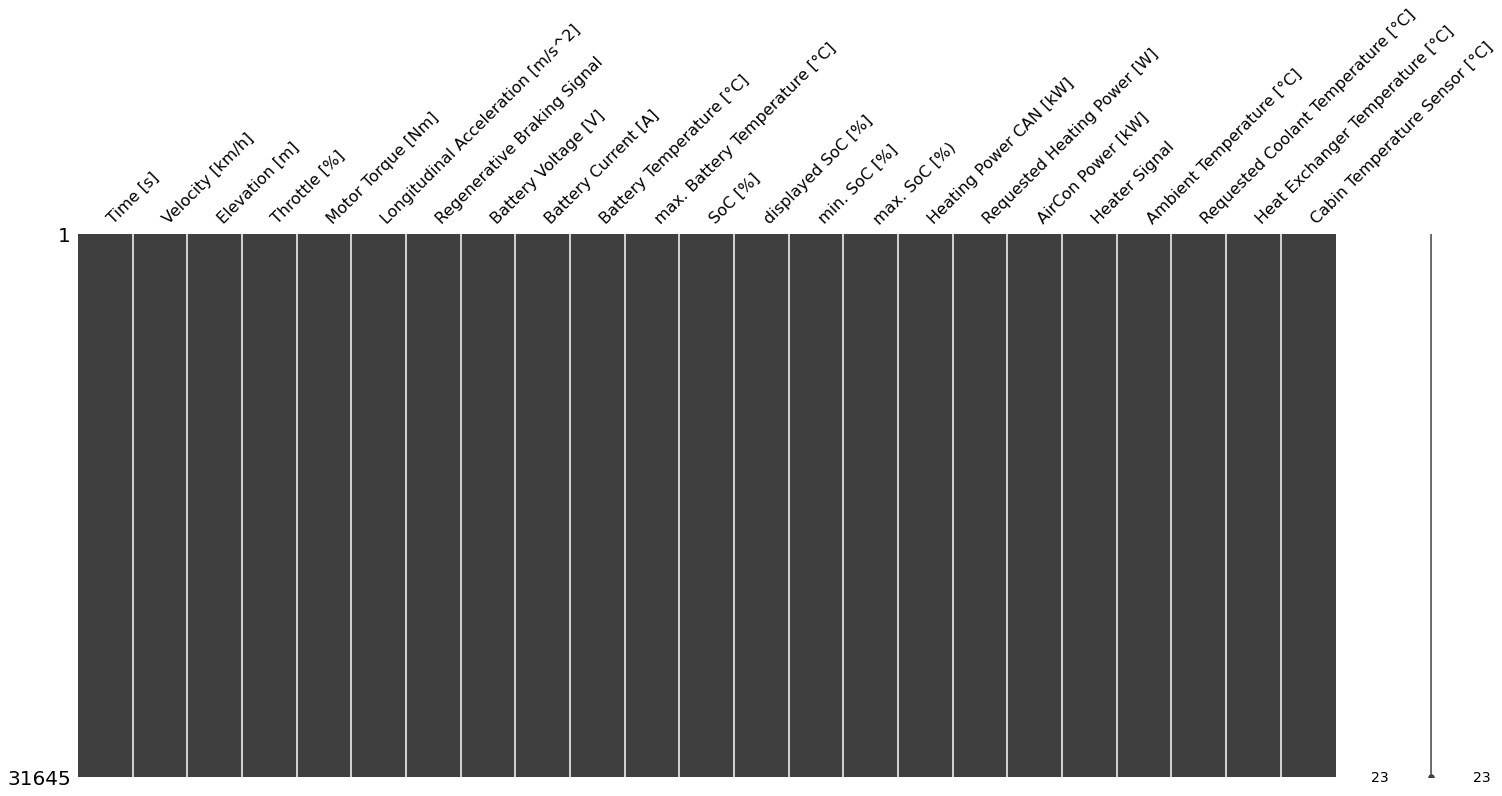

In [6]:
missingno.matrix(dataset)

In [7]:
display(f'O dataset de treino tem {dataset.isnull().sum().sum()} nulos.')

'O dataset de treino tem 0 nulos.'

In [58]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31645 entries, 0 to 31644
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Time [s]                            31645 non-null  float64
 1   Velocity [km/h]                     31645 non-null  float64
 2   Elevation [m]                       31645 non-null  float64
 3   Throttle [%]                        31645 non-null  float64
 4   Motor Torque [Nm]                   31645 non-null  float64
 5   Longitudinal Acceleration [m/s^2]   31645 non-null  float64
 6   Regenerative Braking Signal         31645 non-null  float64
 7   Battery Voltage [V]                 31645 non-null  float64
 8   Battery Current [A]                 31645 non-null  float64
 9   Battery Temperature [°C]            31645 non-null  float64
 10  max. Battery Temperature [°C]       31645 non-null  float64
 11  SoC [%]                             31645

In [8]:
display(dataset.describe())

,Time [s],Velocity [km/h],Elevation [m],Throttle [%],Motor Torque [Nm],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [°C],max. Battery Temperature [°C],SoC [%],displayed SoC [%],min. SoC [%],max. SoC [%),Heating Power CAN [kW],Requested Heating Power [W],AirCon Power [kW],Heater Signal,Ambient Temperature [°C],Requested Coolant Temperature [°C],Heat Exchanger Temperature [°C],Cabin Temperature Sensor [°C]
count,31645.000000,31645.000000,31645.000000,31645.00000,31645.000000,31645.000000,31645.000000,31645.000000,31645.000000,31645.000000,31645.000000,31645.000000,31645.000000,31645.0,31645.0,31645.000000,31645.000000,31645.000000,31645.0,31645.000000,31645.0,31645.000000,31645.000000
mean,1582.200000,52.323103,517.082564,31.51896,7.524794,-0.018657,0.036601,384.474970,-15.050015,26.662913,27.183644,74.021058,86.005932,8.0,90.0,5.321785,3.844826,0.623578,1.0,30.183234,85.0,9.726123,26.417259
std,913.526897,35.345942,32.573102,14.99880,25.775905,0.479201,0.187513,4.042393,29.964566,0.862065,0.954336,6.465418,8.555527,0.0,0.0,0.019609,113.673767,0.131684,0.0,1.544447,0.0,3.737691,0.824105
min,0.000000,0.000000,479.000000,0.00000,-87.070000,-3.680000,0.000000,360.370000,-294.180000,25.000000,26.000000,63.400000,73.000000,8.0,90.0,5.320000,0.000000,0.000000,1.0,26.500000,85.0,7.500000,24.840000
25%,791.100000,18.380000,493.080000,23.46000,-0.820000,-0.190000,0.000000,381.400000,-26.720000,26.000000,26.000000,67.200000,77.000000,8.0,90.0,5.320000,0.000000,0.600000,1.0,29.000000,85.0,7.840000,26.010000
50%,1582.200000,56.430000,505.110000,35.58000,6.500000,-0.020000,0.000000,385.450000,-10.510000,26.000000,27.000000,75.500000,88.000000,8.0,90.0,5.320000,0.000000,0.640000,1.0,30.500000,85.0,8.000000,26.340000
75%,2373.300000,79.430000,543.660000,43.03000,18.500000,0.180000,0.000000,387.200000,-2.820000,27.000000,28.000000,78.200000,91.500000,8.0,90.0,5.320000,0.000000,0.680000,1.0,31.500000,85.0,8.500000,26.840000
max,3164.400000,125.880000,578.000000,74.40000,163.590000,2.760000,1.000000,394.660000,136.410000,28.000000,29.000000,85.100000,100.000000,8.0,90.0,5.800000,4920.000000,0.960000,1.0,33.000000,85.0,20.000000,28.010000


#### 2.5 - Criando as features engineerings necessárias para realizar a regressão com o melhor desempenho para os 3 bancos de dados, treino, teste e validação

In [9]:
dataset['Distance [km]'] = (dataset['Time [s]']/3600) * dataset['Velocity [km/h]'].mean()
dataset['min. SoC [%]'] = dataset['SoC [%]'].min()
dataset['max. SoC [%]'] = dataset['SoC [%]'].max()

#### 2.6- Utilizando a função de correlação e o heatmap do seaborn, vamos plotar um mapa de correlação para vermos as relevancias entre as variáveis. A vantagem é que por termos 100% das variáveis quantitativas, não precisamos fazer nenhum tratamento para a correlação

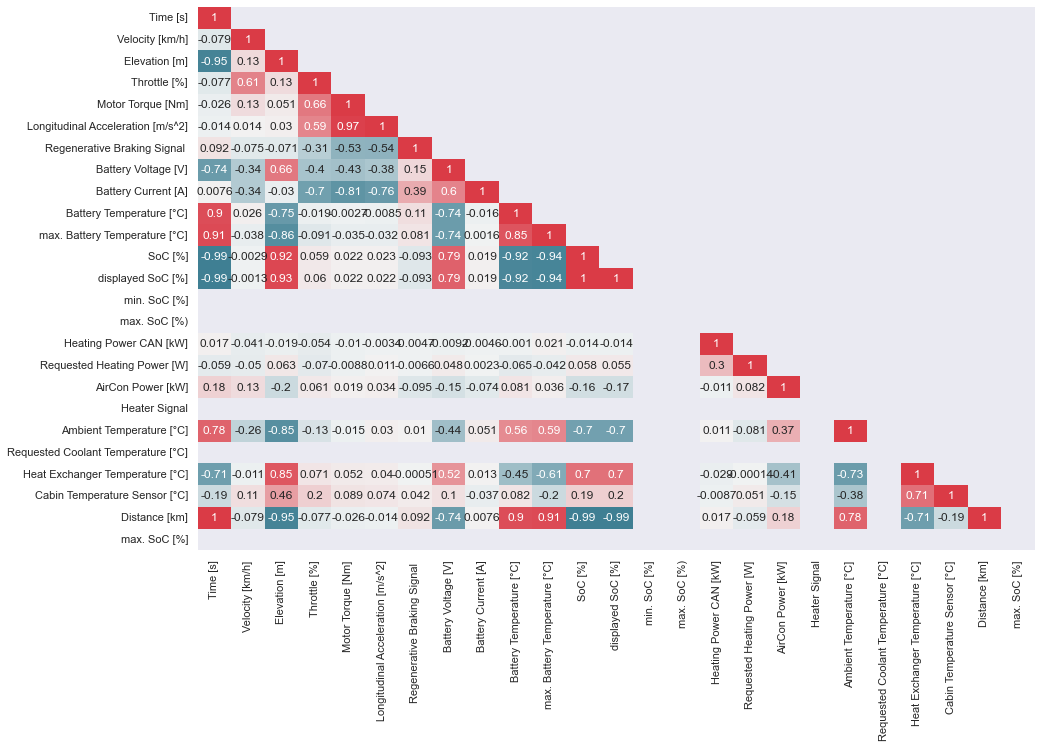

In [10]:
sns.set_theme()
plt.figure(figsize=(15,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.triu(np.ones_like(dataset.corr(), dtype=np.bool),1)
ax = sns.heatmap(dataset.corr(), annot=True, cmap = cmap,cbar=False, mask = mask)

#### 2.7 - Utilizando o Random Forest vamos fazer um feature selection para selecionarmos as variáveis mais relevantes, desconsiderando as que possuem relação direta com o SOC

<BarContainer object of 9 artists>

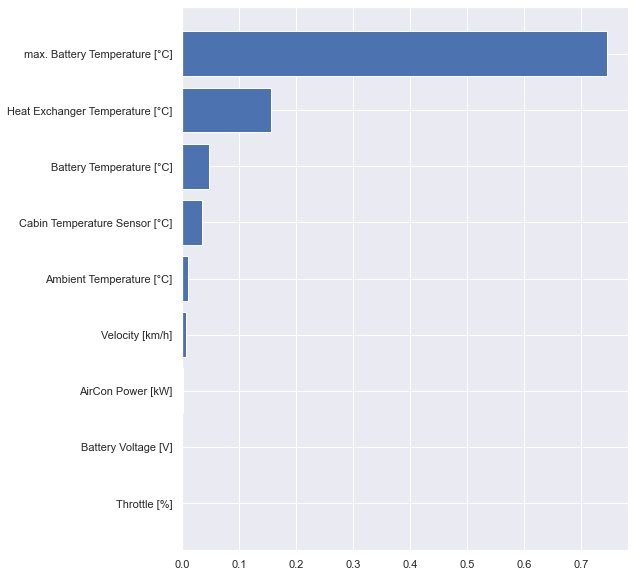

In [11]:
X = dataset.drop(['SoC [%]','Time [s]', 'Distance [km]', 'Elevation [m]','displayed SoC [%]' ], axis=1)
y = dataset['SoC [%]']
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X, y)
#Criaremos uma variável considerando as top 10 features de maior importância na predição e plotá-las
most_relevant_features = pd.DataFrame(rf.feature_importances_, X.columns).reset_index().\
                        rename(columns={'index':'features', 0:'score'})
most_relevant_features = most_relevant_features.nlargest(9, 'score').sort_values(by='score', ascending = True)
sns.set_theme()
plt.figure(figsize=(8,10))
plt.barh(most_relevant_features.features, most_relevant_features.score)

Como conclusão acima, vemos que as variáveis que mais tem correlação com o estado de carga da bateria são as variáveis de temperatura, tensão e aceleração, portanto iremos selecioná-las para fazermos a predição.

#### 2.8 - Criando a variável para seleção das features de maior importância

In [12]:
feature_selected = ['Elevation [m]', 'Battery Voltage [V]','Battery Temperature [°C]', 
                    'max. Battery Temperature [°C]', 'Ambient Temperature [°C]', 'Velocity [km/h]', 'Time [s]','SoC [%]']

In [13]:
#Ajustando a coluna do banco de dados
dataset_modificado = dataset[feature_selected]
dataset_modificado.rename(columns={'Elevation [m]':'elevation', 'Battery Voltage [V]':'battery_voltage', 
                         'Battery Temperature [°C]':'battery_temperature',
                         'max. Battery Temperature [°C]':'max_battery_temperature',
                         'Ambient Temperature [°C]':'ambient_temperature',
                         'Velocity [km/h]':'velocity','Time [s]':'time', 'SoC [%]':'soc'}, inplace = True)

#### 2.9 - Fazendo uma nova correlação com as features selecionadas para entendermos se temos multicolinearidade

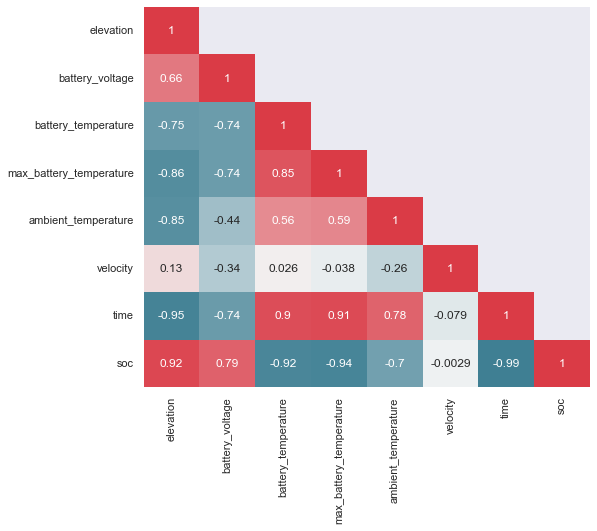

In [14]:
sns.set_theme()
plt.figure(figsize=(8,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.triu(np.ones_like(dataset_modificado.corr(), dtype=np.bool),1)
ax = sns.heatmap(dataset_modificado.corr(), annot=True, cmap = cmap,cbar=False, mask = mask)

#### Baseado na nossa análise de correlação e feature selection utilizando o Random Forest, vamos considerar as features acima para fazermos a regressão

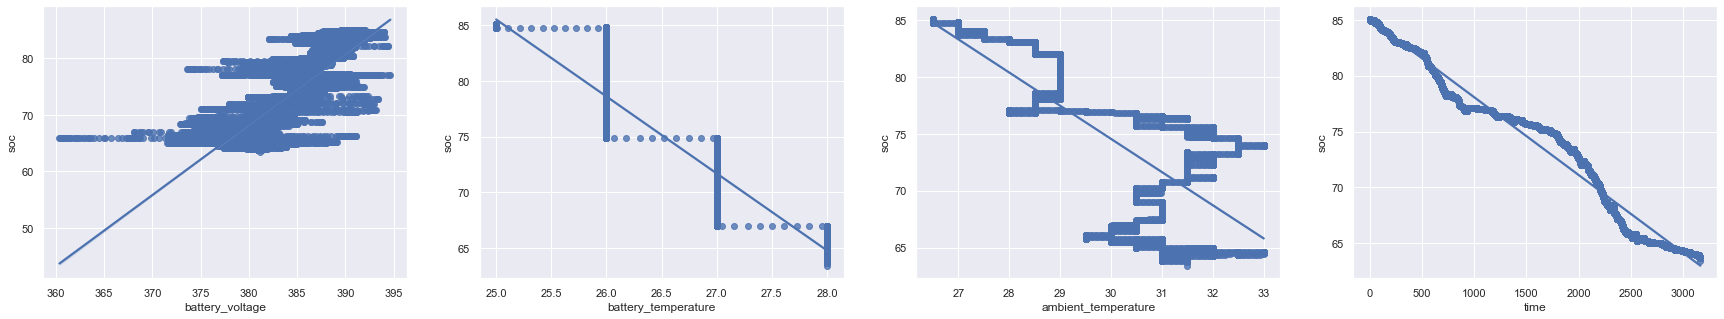

In [57]:
features = ['battery_voltage', 'battery_temperature', 'ambient_temperature', 'time']
sns.set_theme()
fig = plt.subplots(figsize = (30,5))
for i, value in enumerate(features, start=1):
    fig = plt.subplot(1,4,i)
    ax = sns.regplot(data=dataset_modificado, x = value,y='soc')

Já na análise gráfica acima vemos que o estado de carga vai caindo conforme a demana aumenta (velocidade e tensão) e quando a temperatura aumenta. Podemos dizer que as variáveis explicativas tem um impacto negativo e propiciam para a degradação da bateria.

[]

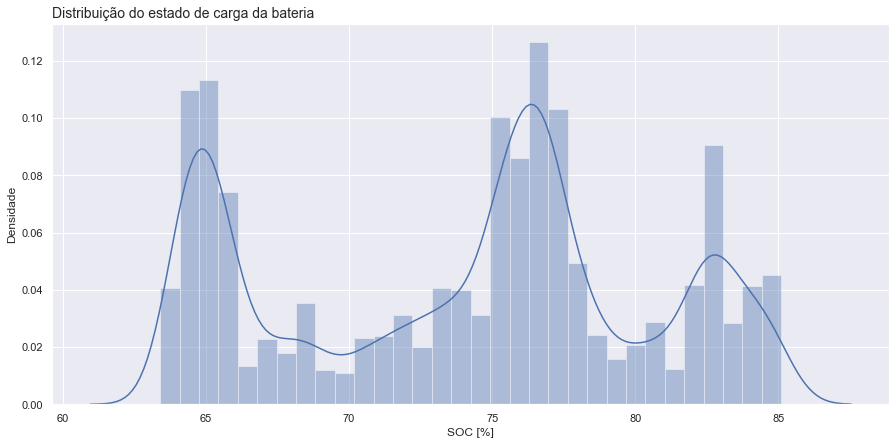

In [16]:
#Aqui iremos plotar um histograma do preço dos imóveis logarítimo
sns.set_theme()
plt.figure(figsize=(15,7))
ax= sns.distplot(dataset_modificado['soc'])
ax.set(xlabel='SOC [%]', ylabel= 'Densidade')
ax.set_title('Distribuição do estado de carga da bateria', loc = 'left', fontsize = 14)
ax.plot()

#### A distribuição dos dados seguem uma curva não normal e mesmo aplicando o Log ela permanecerá não normal, como os testes funcionam com curvas 

#### 3.0 - Análise Estatística utilizando a biblioteca statsmodels

In [17]:
modelo = smf.ols('soc ~ elevation + battery_voltage + battery_temperature + max_battery_temperature + \
                    ambient_temperature + velocity + time' ,
                 data = dataset_modificado).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    soc   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 5.094e+05
Date:                Tue, 20 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:54:58   Log-Likelihood:                -29067.
No. Observations:               31645   AIC:                         5.815e+04
Df Residuals:                   31637   BIC:                         5.822e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  61.8137      0.874     70.726      0.000      60.101      63.527
elevation                   0.0373      0.001     66.904      0.000       0.036       0.038
battery_voltage             0.0685      0.002     42.620      0.000       0.065       0.072
battery_temperature        -1.0234      0.014    -72.856      0.000      -1.051      -0.996
max_battery_temperature    -0.5514      0.011    -50.740      0.000      -0.573      -0.530
ambient_temperature         0.5561      0.005    104.424      0.000       0.546       0.567
velocity                   -0.0058      0.000    -47.311      0.000      -0.006      -0.006
time                       -0.0048   2.86e-05   -169.338      0.000      -0.005      -0.005
==============================================================================
Omnibus:                      394.120   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              340.295
Skew:                          -0.198   Prob(JB):                     1.28e-74
Kurtosis:                       2.681   Cond. No.                     4.90e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Pela análise estatística acima, vemos que todas as variáveis escolhidas estão abaixo dos 5% da população, ou seja, não podemos rejeitar H0 o que significa que todas as variáveis tem um impacto significativo na variável target (SOC)

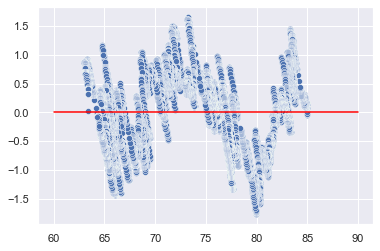

In [18]:
#Distribuição dos resíduo em função da predição
ax = sns.scatterplot(y = modelo.resid, x= modelo.predict(dataset_modificado))
ax = sns.lineplot(x = [60,90], y = [0,0], color = 'red')

<AxesSubplot:ylabel='Count'>

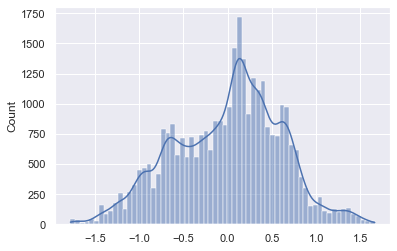

In [19]:
sns.histplot(modelo.resid, kde=True)

In [20]:
#Analisando os parametros
pd.DataFrame(round((np.exp(modelo.params[1:]) - 1)*100, 2), columns=['betas'])

,betas
elevation,3.81
battery_voltage,7.09
battery_temperature,-64.06
max_battery_temperature,-42.39
ambient_temperature,74.39
velocity,-0.58
time,-0.48


<b>Resíduos:</b><br>
Temos os resíduos em função dos valores estimados. Podemos observar a independência e a homocedasticidade, que os resíduos se distribuem de maneira razoavelmente aleatória e com mesma amplitude em torno do zero.<br>
<b>R^2:</b><br>
Temos um R^2 de 0.983 e o ajustado também de 0.983 significa que as variáveis explicativas se ajustam a linha de regressão.<br>

#### 4 - Pre-processamento dos datasets de treino, teste e validação

#### 4.1 - Preparando os dadasets de treino, validação e teste

In [21]:
X = dataset_modificado.drop(['soc'], axis = 1)
y = dataset_modificado.soc
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [22]:
# Função de métricas
def metrics_report(y, y_pred, dataset_name='valid'):
    mean_y = np.mean(y)
    mean_pred = np.mean(y_pred)

    rmse = round(math.sqrt(mean_squared_error(y, y_pred)), 2)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    mape = mean_absolute_percentage_error(y, y_pred)

    report = pd.DataFrame({
    'metric': ['RMSE', 'MAE', 'R^2', 'MAPE', 'Avg. target', 'Avg. Prediction'],
    dataset_name: [rmse, mae, r2, mape, mean_y, mean_pred]
    })

    report[dataset_name] = report[dataset_name].round(2)
    return report

#### 4.4 - Fazendo a regressão com os dados de treino

##### 4.4.1 - Utilizando o primeiro modelo de regressão Elastic Net

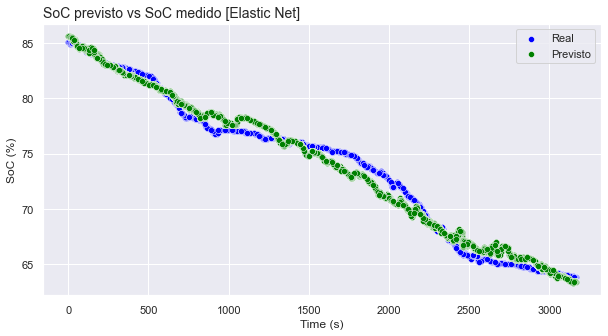

In [23]:
model_en = ElasticNet(alpha=1.0, l1_ratio=0.5)
model_en.fit(X_train, y_train)
plt.figure(figsize=(10,5))
ax = sns.scatterplot(X_test['time'], y_test, label = 'Real', color = 'blue')
ax = sns.scatterplot(X_test['time'], model_en.predict(X_test), label = 'Previsto', color = 'green')
ax.set_title('SoC previsto vs SoC medido [Elastic Net]', loc = 'left', size = 14)
ax.set_xlabel('Time (s)', size = 12)
ax.set_ylabel('SoC (%)', size = 12)
ax.legend()
plt.show()

In [24]:
elastic_net_report = metrics_report(y_test, model_en.predict(X_test), 'Elastic Net')
elastic_net_report

,metric,Elastic Net
0,RMSE,0.92
1,MAE,0.76
2,R^2,0.98
3,MAPE,0.01
4,Avg. target,73.98
5,Avg. Prediction,74.01


##### 4.4.2 - Utilizando o segundo modelo de regressão Lasso

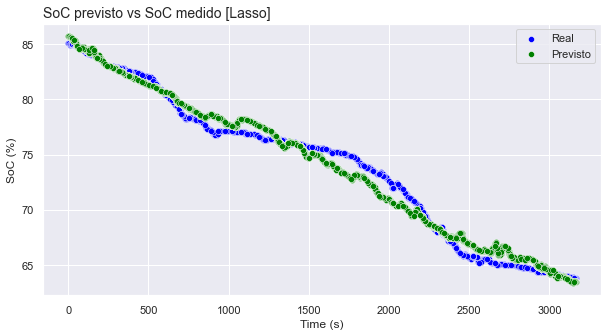

In [25]:
model_lasso = Lasso(alpha=1.0)
model_lasso.fit(X_train, y_train)
plt.figure(figsize=(10,5))
ax = sns.scatterplot(X_test['time'], y_test, label = 'Real', color = 'blue')
ax = sns.scatterplot(X_test['time'], model_lasso.predict(X_test), label = 'Previsto', color = 'green')
ax.set_title('SoC previsto vs SoC medido [Lasso]', loc = 'left', size = 14)
ax.set_xlabel('Time (s)', size = 12)
ax.set_ylabel('SoC (%)', size = 12)
ax.legend()
plt.show()

In [26]:
lasso_report = metrics_report(y_test, model_lasso.predict(X_test), 'Lasso')
lasso_report

,metric,Lasso
0,RMSE,0.95
1,MAE,0.78
2,R^2,0.98
3,MAPE,0.01
4,Avg. target,73.98
5,Avg. Prediction,74.01


##### 4.4.3 - Utilizando o terceiro modelo de regressão SVR

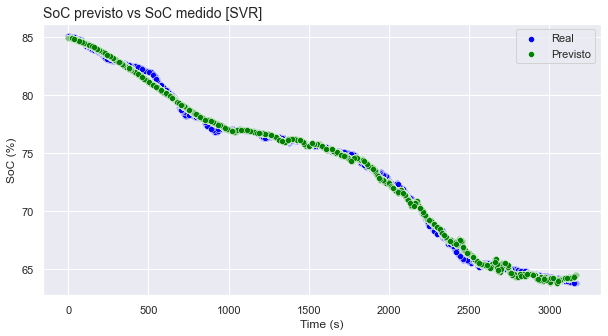

In [27]:
model_svr = SVR(C=1.0, epsilon=0.2)
model_svr.fit(X_train, y_train)
plt.figure(figsize=(10,5))
ax = sns.scatterplot(X_test['time'], y_test, label = 'Real', color = 'blue')
ax = sns.scatterplot(X_test['time'], model_svr.predict(X_test), label = 'Previsto', color = 'green')
ax.set_title('SoC previsto vs SoC medido [SVR]', loc = 'left', size = 14)
ax.set_xlabel('Time (s)', size = 12)
ax.set_ylabel('SoC (%)', size = 12)
ax.legend()
plt.show()

In [28]:
svr_report = metrics_report(y_test, model_svr.predict(X_test), 'SVR')
svr_report

,metric,SVR
0,RMSE,0.36
1,MAE,0.28
2,R^2,1.00
3,MAPE,0.00
4,Avg. target,73.98
5,Avg. Prediction,73.99


##### 4.4.4 - Utilizando o quarto modelo de regressão redes neurais 

In [29]:
input_size=2
output_size=1
model_NN = tf.keras.Sequential([tf.keras.layers.Dense(output_size)])
custom_optimizer=tf.keras.optimizers.SGD(learning_rate=0.02)
model_NN.compile(optimizer="adam", loss=tf.keras.losses.MeanAbsoluteError(), metrics="acc")
model_NN.fit(X_train, y_train,epochs=10,verbose=1)

Epoch 1/10
693/693 [==============================] - 4s 5ms/step - loss: 272.1317 - acc: 0.0000e+00
Epoch 2/10
693/693 [==============================] - 3s 5ms/step - loss: 16.2051 - acc: 0.0000e+00
Epoch 3/10
693/693 [==============================] - 3s 5ms/step - loss: 3.6709 - acc: 0.0000e+00
Epoch 4/10
693/693 [==============================] - 3s 5ms/step - loss: 3.4771 - acc: 0.0000e+00
Epoch 5/10
693/693 [==============================] - 3s 5ms/step - loss: 3.2308 - acc: 0.0000e+00
Epoch 6/10
693/693 [==============================] - 3s 5ms/step - loss: 2.9987 - acc: 0.0000e+00
Epoch 7/10
693/693 [==============================] - 3s 5ms/step - loss: 2.7275 - acc: 0.0000e+00
Epoch 8/10
693/693 [==============================] - 3s 4ms/step - loss: 2.4793 - acc: 0.0000e+00
Epoch 9/10
693/693 [==============================] - 3s 5ms/step - loss: 2.2178 - acc: 0.0000e+00
Epoch 10/10
693/693 [==============================] - 3s 4ms/step - loss: 1.9962 - acc: 0.0000e+00


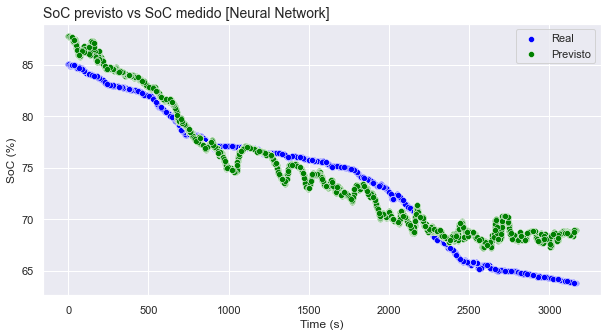

In [30]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(X_test['time'], y_test, label = 'Real', color = 'blue')
ax = sns.scatterplot(X_test['time'], [i[0] for i in model_NN.predict_on_batch(X_test)], label = 'Previsto', color = 'green')
ax.set_title('SoC previsto vs SoC medido [Neural Network]', loc = 'left', size = 14)
ax.set_xlabel('Time (s)', size = 12)
ax.set_ylabel('SoC (%)', size = 12)
ax.legend()
plt.show()

In [31]:
NN_report = metrics_report(y_test, model_NN.predict(X_test), 'NN')
NN_report

297/297 [==============================] - 1s 2ms/step


,metric,NN
0,RMSE,2.26
1,MAE,1.86
2,R^2,0.88
3,MAPE,0.03
4,Avg. target,73.98
5,Avg. Prediction,74.65


##### 4.4.3 - Utilizando o quinto modelo de regressão Random Forest Regressor

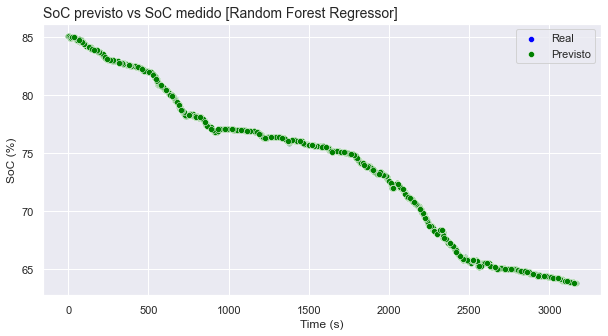

In [32]:
model_rf = RandomForestRegressor(n_estimators=250, n_jobs= 5)
model_rf.fit(X_train, y_train)
plt.figure(figsize=(10,5))
ax = sns.scatterplot(X_test['time'], y_test, label = 'Real', color = 'blue')
ax = sns.scatterplot(X_test['time'], model_rf.predict(X_test), label = 'Previsto', color = 'green')
ax.set_title('SoC previsto vs SoC medido [Random Forest Regressor]', loc = 'left', size = 14)
ax.set_xlabel('Time (s)', size = 12)
ax.set_ylabel('SoC (%)', size = 12)
ax.legend()
plt.show()

In [33]:
rf_report = metrics_report(y_test, model_rf.predict(X_test), 'Random Forest')
rf_report

,metric,Random Forest
0,RMSE,0.01
1,MAE,0.00
2,R^2,1.00
3,MAPE,0.00
4,Avg. target,73.98
5,Avg. Prediction,73.98


##### 4.4.4 - Utilizando o segundo modelo de regressão Ridge

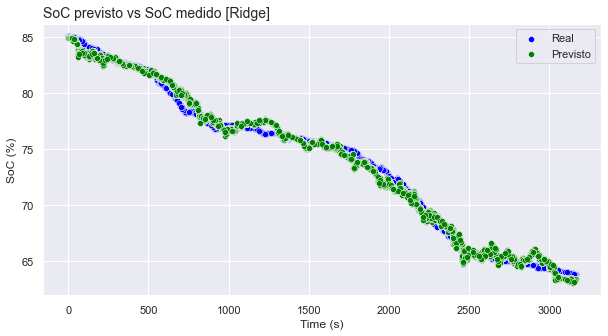

In [34]:
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)
plt.figure(figsize=(10,5))
ax = sns.scatterplot(X_test['time'], y_test, label = 'Real', color = 'blue')
ax = sns.scatterplot(X_test['time'], model_ridge.predict(X_test), label = 'Previsto', color = 'green')
ax.set_title('SoC previsto vs SoC medido [Ridge]', loc = 'left', size = 14)
ax.set_xlabel('Time (s)', size = 12)
ax.set_ylabel('SoC (%)', size = 12)
ax.legend()
plt.show()

In [35]:
ridge_report = metrics_report(y_test, model_ridge.predict(X_test), 'Ridge')
ridge_report

,metric,Ridge
0,RMSE,0.60
1,MAE,0.49
2,R^2,0.99
3,MAPE,0.01
4,Avg. target,73.98
5,Avg. Prediction,73.99


In [36]:
pd.concat([rf_report.set_index('metric'), 
           NN_report.set_index('metric'),
           svr_report.set_index('metric'),
           elastic_net_report.set_index('metric'),
           lasso_report.set_index('metric'),
           ridge_report.set_index('metric')],
          axis=1)

,Random Forest,NN,SVR,Elastic Net,Lasso,Ridge
metric,,,,,,
RMSE,0.01,2.26,0.36,0.92,0.95,0.60
MAE,0.00,1.86,0.28,0.76,0.78,0.49
R^2,1.00,0.88,1.00,0.98,0.98,0.99
MAPE,0.00,0.03,0.00,0.01,0.01,0.01
Avg. target,73.98,73.98,73.98,73.98,73.98,73.98
Avg. Prediction,73.98,74.65,73.99,74.01,74.01,73.99


https://analisemacro.com.br/tag/filtro-de-kalman-com-o-python/ <br>
https://www.coursera.org/lecture/battery-state-of-health/4-5-3-how-to-estimate-states-and-parameters-at-the-same-time-thpWU <br>
https://embarcados.com.br/webinar-sistema-de-gerenciamento-de-baterias-bms/ <br>
https://publications.lib.chalmers.se/records/fulltext/167306.pdf <br>
https://www.youtube.com/watch?v=yrSp5xM0sxw&t=2268s<br>

https://www.jackogrady.me/battery-management-system/state-of-charge (******)<br>
https://www.quantrocket.com/codeload/quant-finance-lectures/quant_finance_lectures/Lecture45-Kalman-Filters.ipynb.html<br>

Elastic Net para prever bateria

https://github.com/petermattia/predicting-battery-lifetime<br>
https://www.rutronik.com/article/detail/News/determining-the-state-of-health-of-batteries-quickly-and-precisely/#:~:text=Depending%20on%20its%20actual%20application,between%2070%25%20and%2080%25.<br>
https://www.kaggle.com/datasets/atechnohazard/battery-and-heating-data-in-real-driving-cycles<br>
https://la.mathworks.com/help/predmaint/ug/predict-remaining-cycle-life-of-batteries-from-initial-operation-data.html<br>
https://insideevs.com/news/502569/bmw-i3-fast-charging-analysed/#:~:text=The%20peak%20C%2Drate*%20%2D,80%25%20SOC%20is%201.1C.<br>
https://www.geotab.com/blog/ev-range/